**a trous wavelet transform**

In [1]:
import numpy as np
from scipy import fftpack,signal

def build_atrous_eff(j):
    if j == 0:
        atrous_eff = np.matrix([0.25,0.5,0.25])
        return np.array(np.matmul(atrous_eff.T,atrous_eff))
    elif j >= 1:
        len_atrous_eff = 3 + 2**j
        atrous_eff = np.zeros(len_atrous_eff)
        atrous_eff[0] = 0.25
        atrous_eff[int((len_atrous_eff-1)/2)] = 0.5
        atrous_eff[-1] = 0.25
        atrous_eff = np.matrix(atrous_eff)
        return np.array(np.matmul(atrous_eff.T,atrous_eff))
    else:
        return "Please input a positive integer"
        
def a_trous_wavelet_2D(input_data, level_num):
    if level_num == 1:
        len_atrous_eff = 3
    elif level_num >= 2:
        len_atrous_eff = 3 + 2**(level_num-1)
    else:
        return "Please input a positive integer"
    
    data_shape = np.shape(input_data)

    if np.min(data_shape) > len_atrous_eff:
        output_c = np.empty(shape=(data_shape[0],data_shape[1],level_num))
        wavelet_eff = np.empty(shape=(data_shape[0],data_shape[1],level_num))
        output_c[:,:,0] = np.copy(input_data)
        for i in range(1,level_num):
            output_c[:,:,i] = signal.convolve(input_data, build_atrous_eff(i), mode = "same")
        wavelet_eff[:,:,:-1] = -np.diff(output_c, axis=2)
        wavelet_eff[:,:,-1] = np.copy(output_c[:,:,-1])
        return wavelet_eff
    else:
        print('Please reduce the number of level')


**read SDO/AIA 171 map**

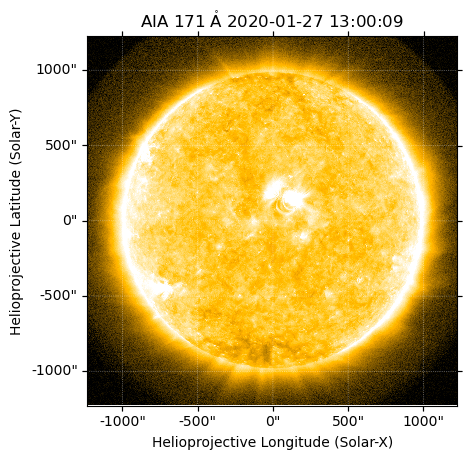

In [2]:
import sunpy.map
import matplotlib.pyplot as plt
aia_map = sunpy.map.Map('/Users/hcp/sunpy/data/aia_lev1_171a_2020_01_27t13_00_09_35z_image_lev1.fits')
aia_map.plot(vmin=0, vmax=650)

**Applying A trous wavelet transform**

In [3]:
input_data = aia_map.data
output_w = a_trous_wavelet_2D(input_data, level_num=6)

**Reconstruct a map with high frequency fine-scale structures**

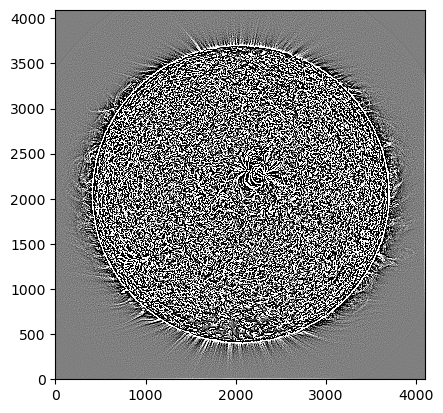

In [4]:
reconstruct_map = output_w[:,:,1] + output_w[:,:,2]
plt.imshow(reconstruct_map,vmin=-1,vmax=1,cmap='grey',origin='lower')